In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df=pd.read_csv("/Users/yshaik/Downloads/movies.csv")  # Reading the csv file
#df.head()
#df  # Looking at whole data

In [3]:
# lets see count of records using different functions in the data set
import time

start=time.time()
count=len(df)
end=time.time()
t1=end-start

start=time.time()
count=len(df.index)         # len(df.index) statement will take less time execute compared to others
end=time.time()
t2=end-start

start=time.time()
count=df.shape[0]
end=time.time()
t3=end-start

print(f't1: {t1}',f't2: {t2}',f't3: {t3}')
print(count)


t1: 4.506111145019531e-05 t2: 4.506111145019531e-05 t3: 4.1961669921875e-05
7668


#None/NaN values are one of the major problems in Data Analysis hence before we process, we can deal with the NaN's first

In [4]:
# Cleaning data isna() function
count_Nan_year= df['year'].isna().sum()   # finding NaN(not a number) for a single column year
print(count_Nan_year)
print("------------------------------------------------------------")
# Count of NaN column wise
count_NaN=df.isna().sum()      
print(count_NaN)
print("------------------------------------------------------------")

#Overall count of NaN in df
all_count_NaN= df.isna().sum().sum()
print(f'There are total of {all_count_NaN} values of null in the data frame')

print("------------------------------------------------------------")
#% of nulls in the columns of df
count_NaN=df.isna().mean()      
print(f'{count_NaN}')
#for col in df.columns:
#   col  
#print("{} - {}%".format(df[col],count_NaN)) 

0
------------------------------------------------------------
name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
------------------------------------------------------------
There are total of 2473 values of null in the data frame
------------------------------------------------------------
name        0.000000
rating      0.010042
genre       0.000000
year        0.000000
released    0.000261
score       0.000391
votes       0.000391
director    0.000000
writer      0.000391
star        0.000130
country     0.000391
budget      0.283125
gross       0.024648
company     0.002217
runtime     0.000522
dtype: float64


In [4]:
# Data types of our columns
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# Deleting rows with NaN in df2
df2=df
df_count=len(df.index)
df_count

df2=df2.dropna()
df2_count=len(df2.index)

print(df2_count,df_count)
print(df[df.isnull().any(axis=1)])  # Gives rows NaN in it

5421 7668
                 name rating   genre  year                           released  \
16               Fame      R   Drama  1980       May 16, 1980 (United States)   
19         Stir Crazy      R  Comedy  1980  December 12, 1980 (United States)   
24       Urban Cowboy     PG   Drama  1980       June 6, 1980 (United States)   
25     Altered States      R  Horror  1980  December 25, 1980 (United States)   
26    Little Darlings      R  Comedy  1980     March 21, 1980 (United States)   
...               ...    ...     ...   ...                                ...   
7663     More to Life    NaN   Drama  2020   October 23, 2020 (United States)   
7664      Dream Round    NaN  Comedy  2020   February 7, 2020 (United States)   
7665    Saving Mbango    NaN   Drama  2020          April 27, 2020 (Cameroon)   
7666     It's Just Us    NaN   Drama  2020    October 1, 2020 (United States)   
7667        Tee em el    NaN  Horror  2020    August 19, 2020 (United States)   

      score    vo

In [5]:
#handeling NaN's accordingly by filling some values.
values={'budget':0}
df=df.fillna(value=values)

df['budget'] = df['budget'].astype('int64') # we get error if NaN values are not handled[IntCastingNaNError: 
                                            #Cannot convert non-finite values (NA or inf) to integer]

df['budget'].dtype
values={'name':' ','rating':' ','year':0000,'gross':0}
df=df.fillna(value=values)
#df

In [7]:
df[['DayMonth', 'Y-State']] = df['released'].str.split(',', expand=True)
df['State'] = df['Y-State'].str[5:]
df['YearC'] = df['Y-State'].str[0:5]

df=df.drop(columns=['Y-State'])  # can delete the unwanted columns
#df['DayMonth'] = df['DayMonth'].astype(date)
#df

In [8]:
# ordering data by gross

df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,DayMonth,State,YearC
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162.0,December 18,(United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181.0,April 26,(United States),2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194.0,December 19,(United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138.0,December 18,(United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149.0,April 27,(United States),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0.000000e+00,Gibraltar Entertainment,92.0,January 26,(United States),1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0.000000e+00,Allied Vision,85.0,April 14,(United States),1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0.000000e+00,Trans World Entertainment (TWE),89.0,April 7,(United States),1989
1601,My Twentieth Century,,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0.000000e+00,Budapest Stúdió Vállalat,104.0,January 13,(Japan),1990


In [9]:
#pd.set_option('display.max_rows',None)  # for diplaying data as a scroll down


In [10]:
# drop duplicates
a=df.drop_duplicates() # drops duplicate records if any
#a

In [ ]:
# lets see countries competition making what gross in movies
sns.plot(data=df,x='gross',y='budget',hue='country')


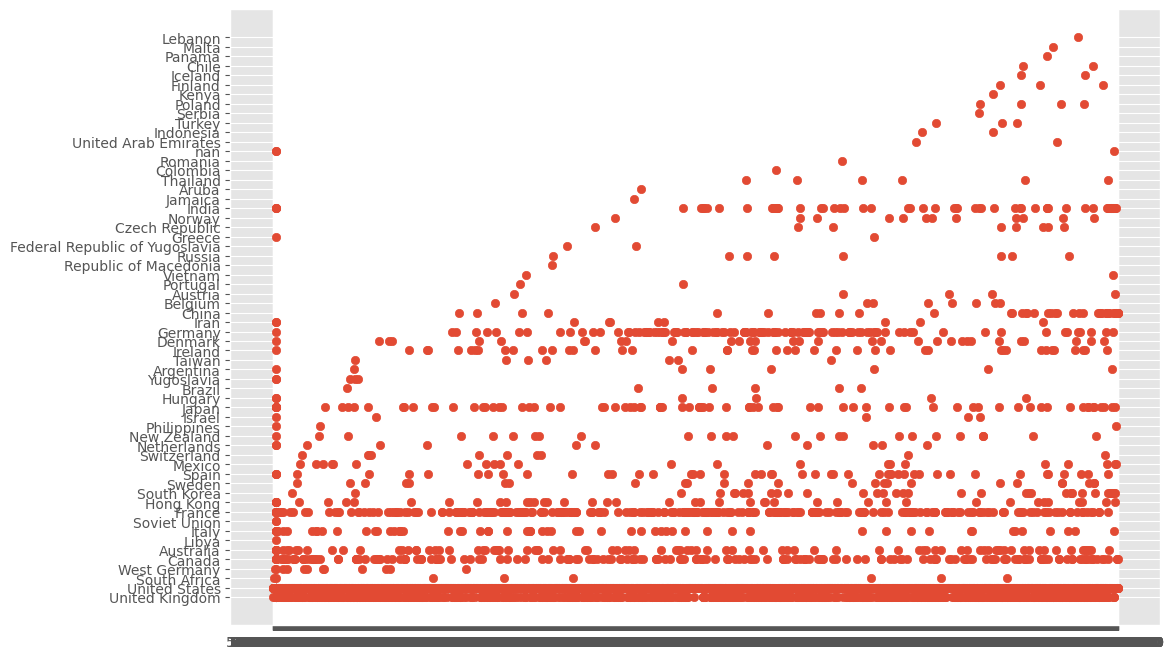

In [11]:
plt.scatter(x=df['gross'].astype(str),y=df['country'].astype(str))
plt.show()

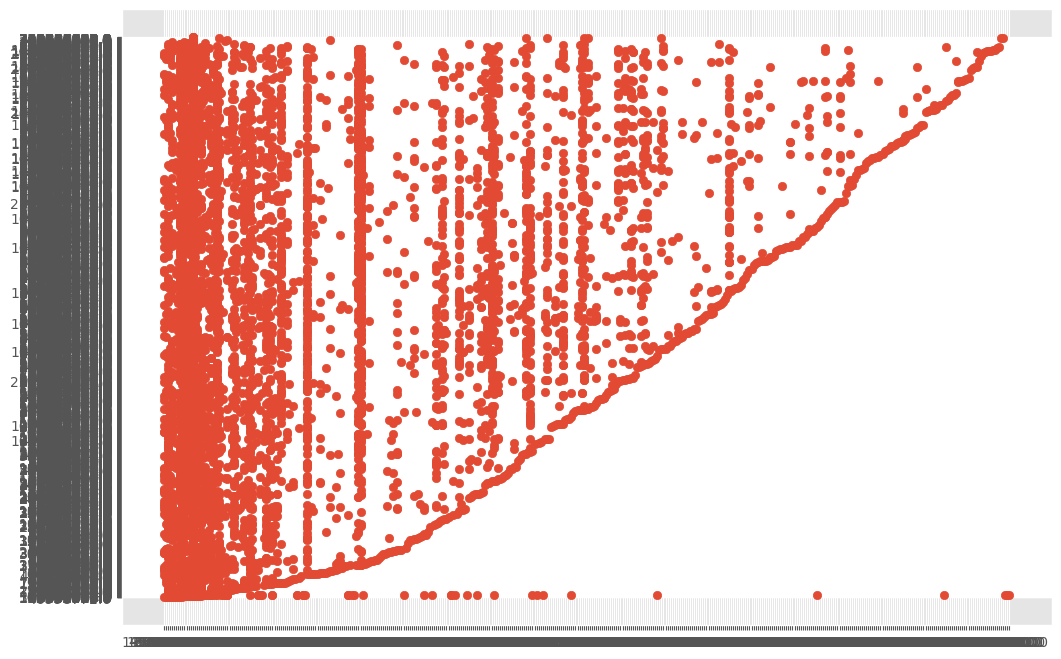

In [12]:
plt.scatter(x=df['budget'].astype(str),y=df['gross'].astype(str))
plt.show()

<AxesSubplot:xlabel='country', ylabel='gross'>

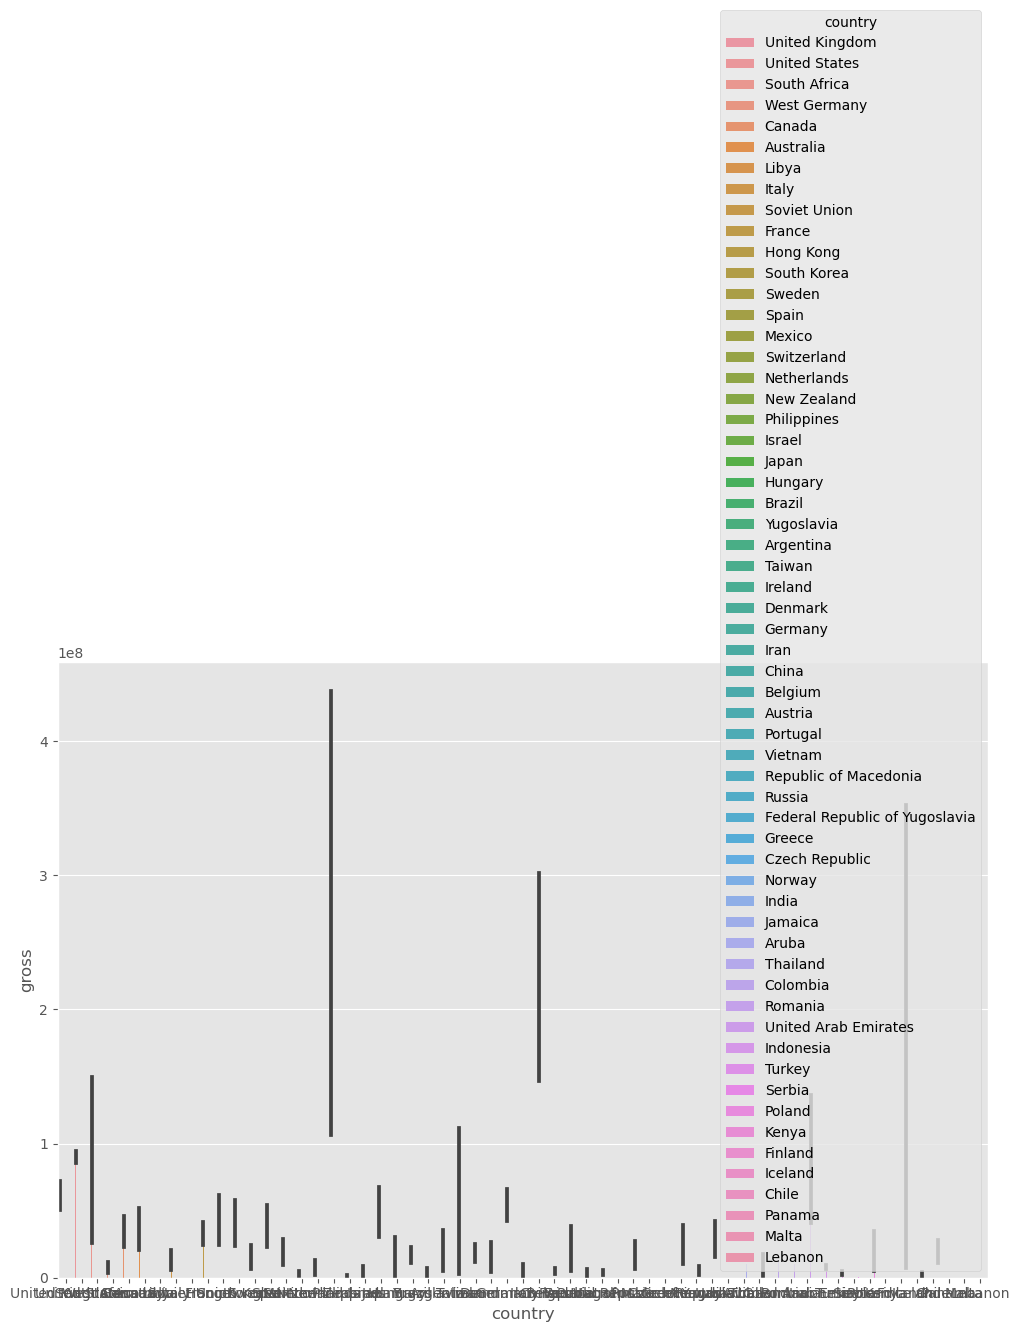

In [9]:
sns.barplot(data=df,x='country',y='gross',hue='country')


<AxesSubplot:xlabel='budget', ylabel='runtime'>

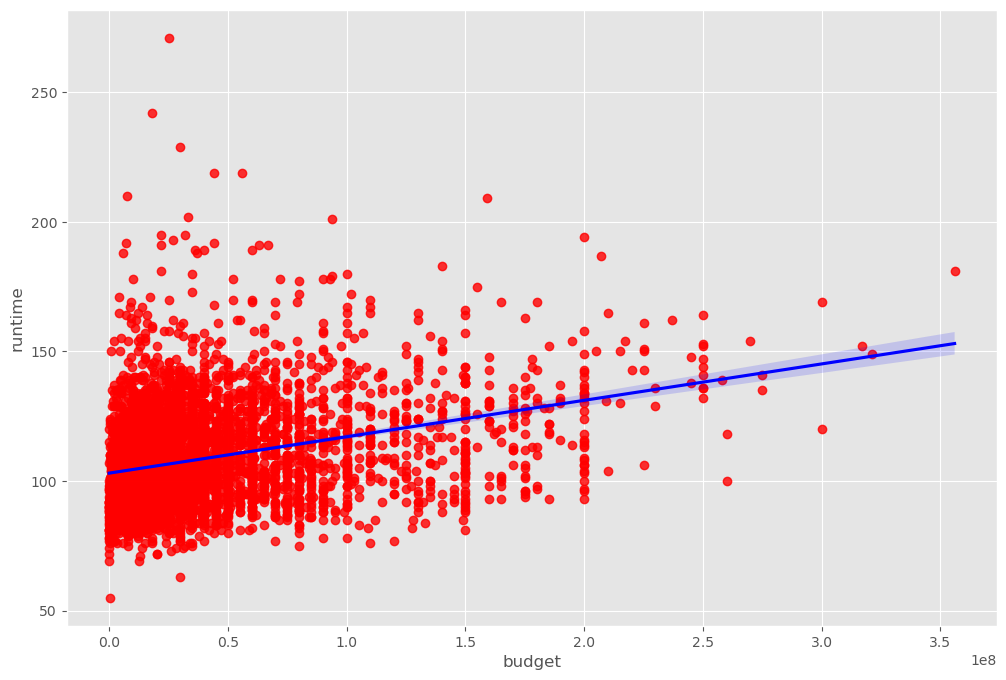

In [9]:
import seaborn as sns
sns.regplot(data=df,x='budget',y='runtime',scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [18]:
# Lets find correlation 
print(df.corr(method='spearman'))    
print(df.corr(method='kendall'))     # types of correlations are-Kendall,Pearson,spearman

#If we want to rank data and order and find correlation we use Spearman and Kendall correlation
# Spearman is calculated on ranked data
# Kendall is based on con cordant and dis cordant of the ranked data

#Perason colrelation is the best and default way to find the corelation
#,because it uses co varriane and its not ranked data(not ordering data)
#Data is numeric and continuos

             year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.317336  0.293084  0.142977
score    0.099045  1.000000  0.428138 -0.001403  0.126116  0.399857
votes    0.469829  0.428138  1.000000  0.502466  0.742050  0.290159
budget   0.317336 -0.001403  0.502466  1.000000  0.693670  0.336370
gross    0.293084  0.126116  0.742050  0.693670  1.000000  0.246243
runtime  0.142977  0.399857  0.290159  0.336370  0.246243  1.000000
             year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.224120  0.200618  0.097184
score    0.067652  1.000000  0.300115 -0.000566  0.086046  0.283611
votes    0.331465  0.300115  1.000000  0.353702  0.548899  0.198240
budget   0.224120 -0.000566  0.353702  1.000000  0.512637  0.235483
gross    0.200618  0.086046  0.548899  0.512637  1.000000  0.168933
runtime  0.097184  0.283611  0.198240  0.235483  0.168933  1.000000


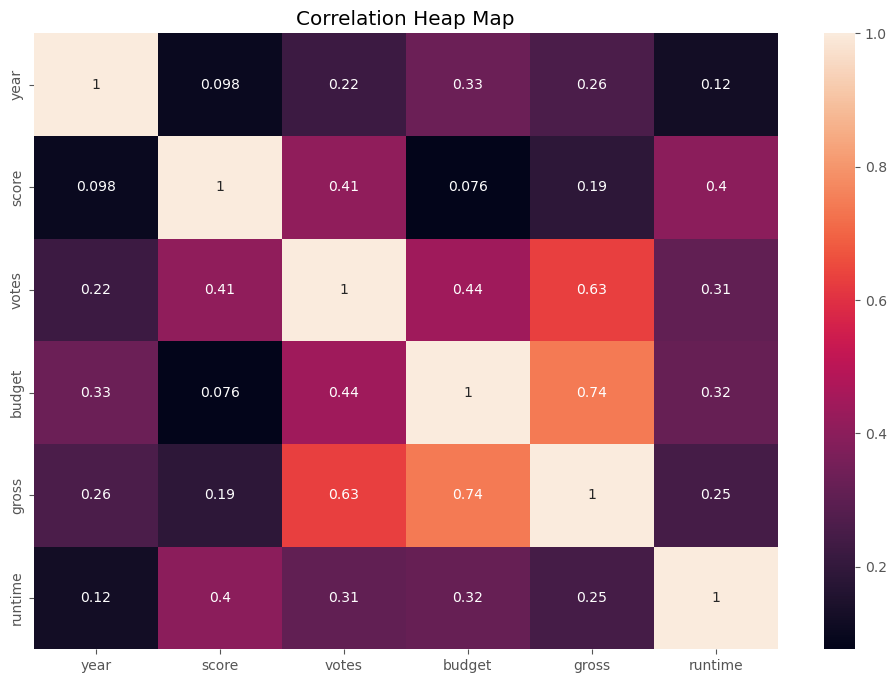

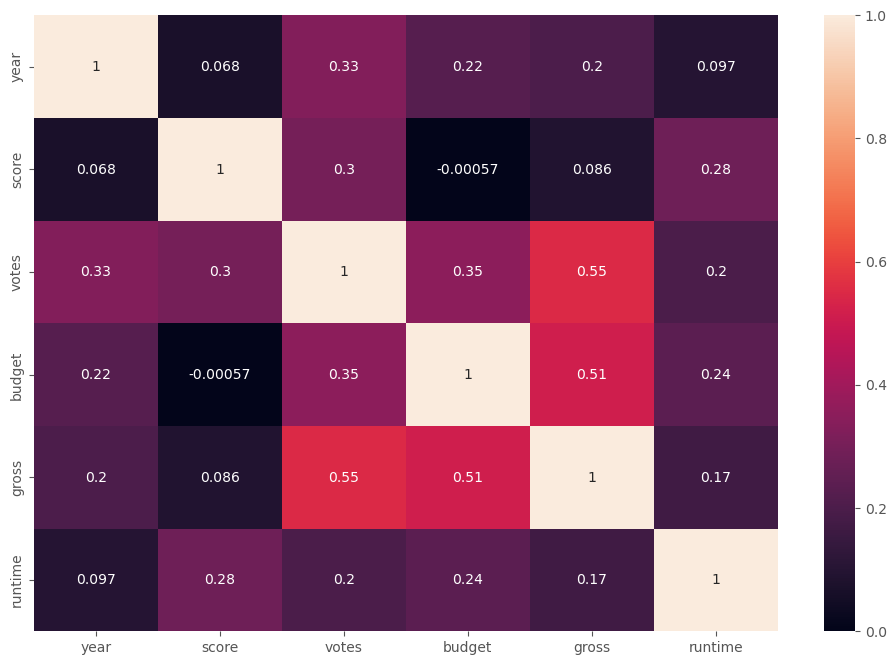

In [10]:
#Correlation visualisation

corrltn_matrix=df.corr(method='pearson')
sns.heatmap(corrltn_matrix,annot=True)
plt.title("Correlation Heap Map")
plt.show()

corrltn_matrix=df.corr(method='kendall')
sns.heatmap(corrltn_matrix,annot=True)
plt.show()

      name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7663  3705      -1      6  2020      2964    3.1       18.0      1500    2289   
7664  1678      -1      4  2020      1107    4.7       36.0       774    2614   
7665  4717      -1      6  2020       193    5.7       29.0      2061    2683   
7666  2843      -1      6  2020      2817    NaN        NaN      1184    1824   
7667  5394      -1     10  2020       391    5.7        7.0      2165    3344   

      star  country      bu

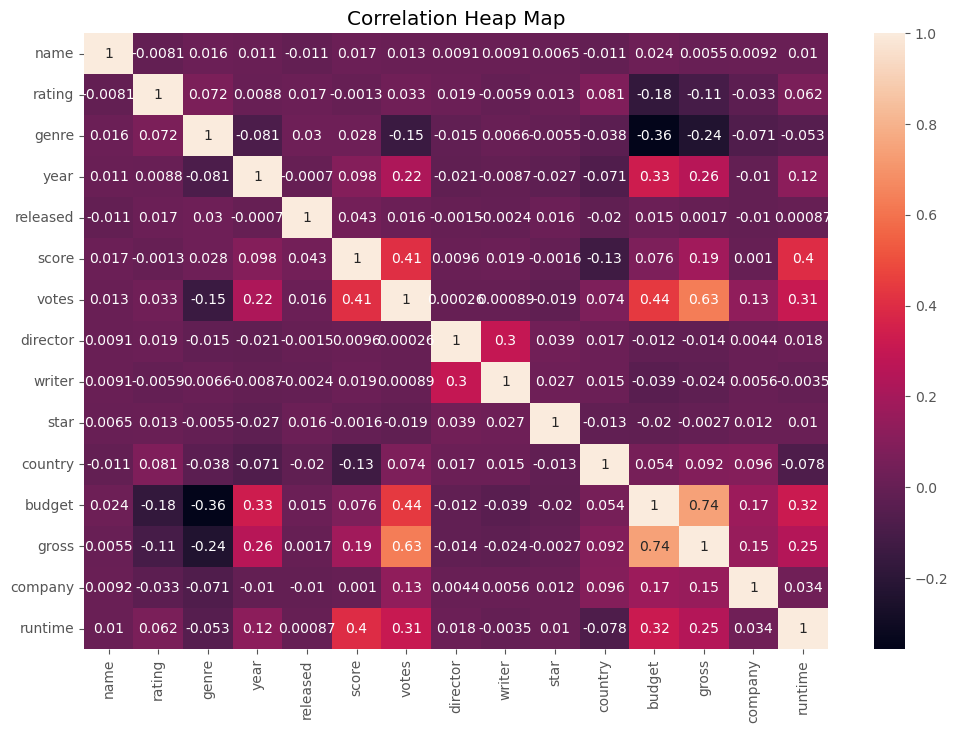

In [19]:
# To find the correlation columns which are non numeric, we can convert those columns to categorial data
df_numerize= df

for col_name in df_numerize.columns:
    if (df_numerize[col_name].dtype=='object'):
        df_numerize[col_name]=df_numerize[col_name].astype('category')
        #df_numerize[col_name]=df_numerize[col_name].cat.codes -->cat codes

print(df_numerize)
  
    
corrltn_matrix=df_numerize.corr(method='pearson')
sns.heatmap(corrltn_matrix,annot=True)
plt.title("Correlation Heap Map")
plt.show()




In [24]:
#correlation pairs

corr_mat=df_numerize.corr()

corr_pairs=corr_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [28]:
#correlation sorting
corr_pairs_sort= corr_pairs.sort_values()
corr_pairs_sort

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [38]:
# higher correlated values
high_corr=corr_pairs[(corr_pairs_sort>0.5)]
high_corr

name      name        1.000000
rating    rating      1.000000
genre     genre       1.000000
year      year        1.000000
released  released    1.000000
score     score       1.000000
votes     votes       1.000000
          gross       0.630757
director  director    1.000000
writer    writer      1.000000
star      star        1.000000
country   country     1.000000
budget    budget      1.000000
          gross       0.740395
gross     votes       0.630757
          budget      0.740395
          gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#budget and votes have highest correlation to gross earning

#company have less correlation 